<a href="https://colab.research.google.com/github/Charan2262002/charan/blob/main/Hue_identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/minor/colors.csv")

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

In [ ]:
image = cv2.imread('/content/drive/MyDrive/minor/minor image.jpg')

The type of this input is <class 'numpy.ndarray'>
Shape: (533, 800, 3)


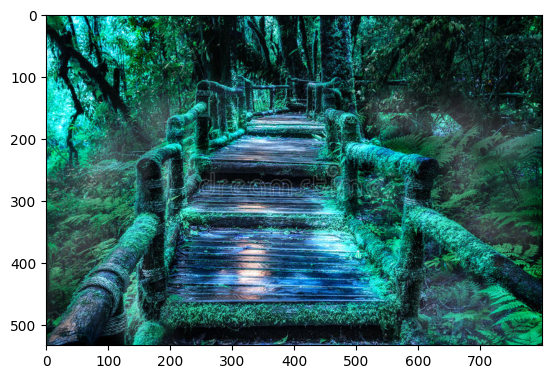

In [ ]:
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

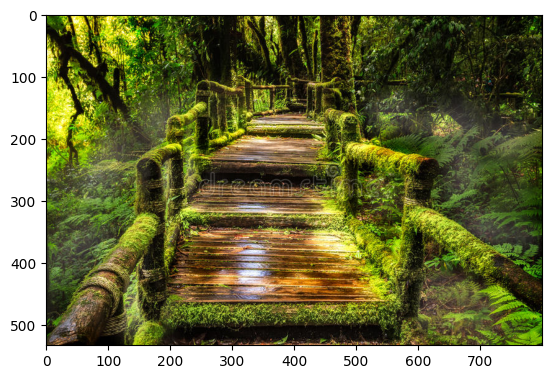

In [ ]:

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

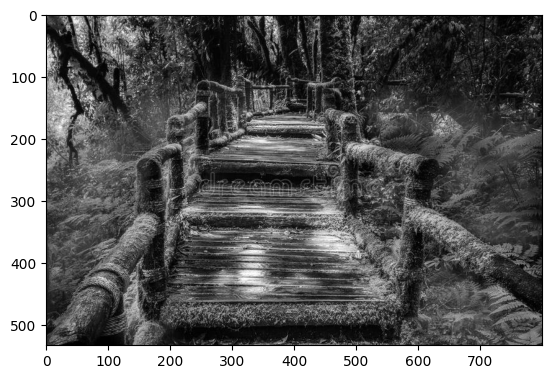

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

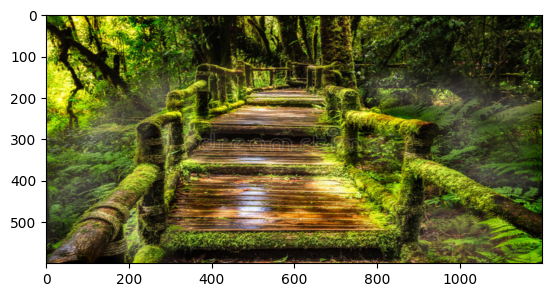

In [ ]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
image = get_image('/content/drive/MyDrive/minor/minor image.jpg')
number_of_colors = 10
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


([<matplotlib.patches.Wedge at 0x7f33ec320f40>,
 [Text(1.090490356643136, 0.14432872918558495, '#100f05'),
  Text(0.938433094979324, 0.573884418892452, '#b6a15f'),
  Text(0.5510898417414901, 0.9519978919773612, '#d6db2f'),
  Text(-0.25720759056417797, 1.0695065475985504, '#64740d'),
  Text(-0.8301669752135846, 0.7216805340763514, '#98a816'),
  Text(-1.0949504852877487, 0.10527789306461045, '#424519'),
  Text(-0.5819317901629009, -0.93346418870667, '#5b5a33'),
  Text(0.16793831610877946, -1.0871047428755647, '#837c41'),
  Text(0.5963997785925889, -0.9242874575015672, '#292b0f'),
  Text(1.027664789063618, -0.39230738116791797, '#e8d9a7')])

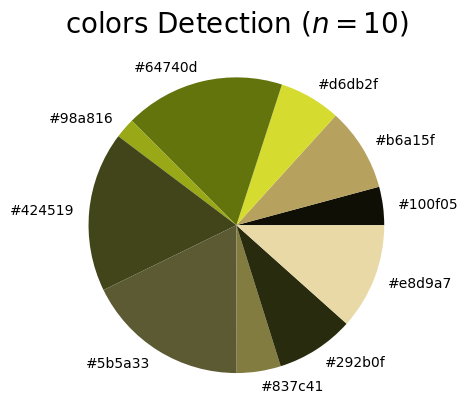

In [ ]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]
plt.title('colors Detection ($n=10$)',fontsize=20)
plt.pie(counts.values(), labels = hex_colors , colors = hex_colors)